In [64]:
import json
import gzip
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x) # to suppress scientific notation


In [2]:
def load_data(file_name, head = 500):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

In [3]:
books = load_data('goodreads_books.json.gz')
authors = load_data('goodreads_book_authors.json.gz')
works = load_data('goodreads_book_works.json.gz')
series = load_data('goodreads_book_series.json.gz')
genres = load_data('goodreads_book_genres_initial.json.gz')
reviews = load_data('goodreads_reviews_dedup.json.gz')
spoilers = load_data('goodreads_reviews_spoiler.json.gz')

In [4]:
print(' == sample record (books) ==')
display(np.random.choice(books))
print(' == sample record (authors) ==')
display(np.random.choice(authors))
print(' == sample record (works) ==')
display(np.random.choice(works))
print(' == sample record (works) ==')
display(np.random.choice(series))
print(' == sample record (series) ==')
display(np.random.choice(genres))
print(' == sample record (genres) ==')
display(np.random.choice(reviews))
print(' == sample record (reviews) ==')
display(np.random.choice(spoilers))
print(' == sample record (spoilers) ==')

 == sample record (books) ==


{'isbn': '1610404297',
 'text_reviews_count': '7',
 'series': ['522874'],
 'country_code': 'US',
 'language_code': 'eng',
 'popular_shelves': [{'count': '34', 'name': 'to-read'},
  {'count': '7', 'name': 'm-m'},
  {'count': '5', 'name': 'vampire'},
  {'count': '3', 'name': 'mm'},
  {'count': '2', 'name': 'vampires'},
  {'count': '2', 'name': 'paranormal'},
  {'count': '2', 'name': 'my-books'},
  {'count': '1', 'name': 'ni'},
  {'count': '1', 'name': 'calibre'},
  {'count': '1', 'name': 'favorites'},
  {'count': '1', 'name': 'sex_none'},
  {'count': '1', 'name': 'challenge_recommendations'},
  {'count': '1', 'name': 'z_amazon'},
  {'count': '1', 'name': 'romance_mm'},
  {'count': '1', 'name': 'paranormal_mm'},
  {'count': '1', 'name': 'kindle-lendable'},
  {'count': '1', 'name': 'humor_mm'},
  {'count': '1', 'name': '1-own-ebook'},
  {'count': '1', 'name': 'mm-vamp'},
  {'count': '1', 'name': 'maybe-some-day'},
  {'count': '1', 'name': 'gay-romance'},
  {'count': '1', 'name': '3'},
  {'

 == sample record (authors) ==


{'average_rating': '4.19',
 'author_id': '7507599',
 'text_reviews_count': '10',
 'name': 'Matt Martin',
 'ratings_count': '57'}

 == sample record (works) ==


{'books_count': '1',
 'reviews_count': '6',
 'original_publication_month': '',
 'default_description_language_code': '',
 'text_reviews_count': '1',
 'best_book_id': '7030881',
 'original_publication_year': '',
 'original_title': '',
 'rating_dist': '5:0|4:4|3:1|2:0|1:0|total:5',
 'default_chaptering_book_id': '',
 'original_publication_day': '',
 'original_language_id': '',
 'ratings_count': '5',
 'media_type': '',
 'ratings_sum': '19',
 'work_id': '7278864'}

 == sample record (works) ==


{'numbered': 'true',
 'note': 'ONLY includes books by Ian Fleming.',
 'description': "The original James Bond books as written by his creator, Ian Fleming. The books should be read in publication order. The exception is book 10 - The Spy Who Loved Mewhich is best read out of sequence, earlier or later in the series, so as not to break up the main sequence of 9 - Thunderball, 11 - On Her Majesty's Secret Service, 12 - You Only Live Twice, and 13 - The Man With the Golden Gunwhich MUSTbe read in that order. 2 - Live and Let Diemust be read before 6 - Doctor No.",
 'title': 'James Bond (Original Series)',
 'series_works_count': '27',
 'series_id': '183496',
 'primary_work_count': '14'}

 == sample record (series) ==


{'book_id': '13519484',
 'genres': {'fantasy, paranormal': 39,
  'young-adult': 20,
  'romance': 7,
  'fiction': 3}}

 == sample record (genres) ==


{'user_id': 'ab2923b738ea3082f5f3efcbbfacb218',
 'book_id': '6948436',
 'review_id': '5b7b273a5d2200a4b3056629256437d0',
 'rating': 5,
 'review_text': "Loved almost everything about this book, and those things I loved less didn't diminish it enough to keep it from the five stars, a level that I rate very few books!",
 'date_added': 'Thu Jun 05 09:32:48 -0700 2014',
 'date_updated': 'Sat Jul 19 08:04:12 -0700 2014',
 'read_at': 'Sun Jun 15 00:00:00 -0700 2014',
 'started_at': 'Thu Jun 05 00:00:00 -0700 2014',
 'n_votes': 0,
 'n_comments': 0}

 == sample record (reviews) ==


{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'timestamp': '2017-03-22',
 'review_sentences': [[0, 'This book was a pure delight.'],
  [0, 'The subtitle "Adventures of a Curious Character" is spot-on.'],
  [0,
   'Feynman gave an amazingly human and honest view into his philosophy and take on life, thought a series of stories.'],
  [0,
   'One thing that struck me most deeply was his passion for learning new things.'],
  [0,
   'You would think a world-famous Physicist would just be passionate for Physics - but Feynman was curious about everything he saw.'],
  [0,
   'He dabbled in art and was successful enough to have a show, he joined a Brazilian Bongo group and competed with them, he hung out in Vegas until he grokked gambling, he spent time in strip bars in Arizona until he figured out how to pick up women, he cracked safes in Los Alamos for fun - the list goes on!'],
  [0,
   'My take: you should have your passions - but you should also have your hobbies.'],
  [0, 'I think I ne

 == sample record (spoilers) ==


In [5]:
type(books)

list

In [6]:
books[1]

{'isbn': '0743509986',
 'text_reviews_count': '6',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '2634', 'name': 'to-read'},
  {'count': '160', 'name': 'fiction'},
  {'count': '92', 'name': 'currently-reading'},
  {'count': '25', 'name': 'contemporary-fiction'},
  {'count': '22', 'name': 'owned'},
  {'count': '19', 'name': 'book-club'},
  {'count': '17', 'name': 'chick-lit'},
  {'count': '16', 'name': 'friendship'},
  {'count': '15', 'name': 'books-i-own'},
  {'count': '12', 'name': 'novel'},
  {'count': '12', 'name': 'general-fiction'},
  {'count': '11', 'name': 'anita-diamant'},
  {'count': '10', 'name': 'owned-books'},
  {'count': '10', 'name': 'contemporary'},
  {'count': '10', 'name': 'women'},
  {'count': '8', 'name': 'adult'},
  {'count': '7', 'name': 'default'},
  {'count': '7', 'name': 'favorites'},
  {'count': '7', 'name': 'didn-t-finish'},
  {'count': '6', 'name': 'own-it'},
  {'count': '6', 'name': 'library'},
  {'count': '6', 'n

In [7]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [8]:
books2 = (parse('goodreads_books.json.gz'))

In [9]:
type(books2)

generator

In [10]:
next(books2)

{'isbn': '0312853122',
 'text_reviews_count': '1',
 'series': [],
 'country_code': 'US',
 'language_code': '',
 'popular_shelves': [{'count': '3', 'name': 'to-read'},
  {'count': '1', 'name': 'p'},
  {'count': '1', 'name': 'collection'},
  {'count': '1', 'name': 'w-c-fields'},
  {'count': '1', 'name': 'biography'}],
 'asin': '',
 'is_ebook': 'false',
 'average_rating': '4.00',
 'kindle_asin': '',
 'similar_books': [],
 'description': '',
 'format': 'Paperback',
 'link': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'authors': [{'author_id': '604031', 'role': ''}],
 'publisher': "St. Martin's Press",
 'num_pages': '256',
 'publication_day': '1',
 'isbn13': '9780312853129',
 'publication_month': '9',
 'edition_information': '',
 'publication_year': '1984',
 'url': 'https://www.goodreads.com/book/show/5333265-w-c-fields',
 'image_url': 'https://images.gr-assets.com/books/1310220028m/5333265.jpg',
 'book_id': '5333265',
 'ratings_count': '3',
 'work_id': '5400751',
 'title': '

In [11]:
def count_lines(file_name):
    print('counting file:', file_name)
    count = 0
    with gzip.open(file_name) as fin:
        for l in fin:
            count += 1
    print('done!')
    return count

In [12]:
n_books = count_lines('goodreads_books.json.gz')
n_works = count_lines('goodreads_book_works.json.gz')
n_authors = count_lines('goodreads_book_authors.json.gz')
n_series = count_lines('goodreads_book_series.json.gz')
n_genres = count_lines('goodreads_book_genres_initial.json.gz')
n_reviews = count_lines('goodreads_reviews_dedup.json.gz')
n_spoilers = count_lines('goodreads_reviews_spoiler.json.gz')

counting file: goodreads_books.json.gz
done!
counting file: goodreads_book_works.json.gz
done!
counting file: goodreads_book_authors.json.gz
done!
counting file: goodreads_book_series.json.gz
done!
counting file: goodreads_book_genres_initial.json.gz
done!
counting file: goodreads_reviews_dedup.json.gz
done!
counting file: goodreads_reviews_spoiler.json.gz
done!


In [13]:
df_book_stats = pd.DataFrame([n_books, n_works, n_authors, n_series, n_genres, n_reviews, n_spoilers],
                            dtype = float, columns = ['count'],
                            index = ['# books', '# works', '# authors', '# series', '# genres', '# reviews', '# spoilers'])
display(df_book_stats)

count
# books     2360655.000
# works     1521962.000
# authors    829529.000
# series     400390.000
# genres    2360655.000
# reviews  15739967.000
# spoilers  1378033.000

In [14]:
interactions = pd.read_csv('goodreads_interactions.csv')

In [15]:
n_interactions = interactions.count()
n_interactions

user_id        228648342
book_id        228648342
is_read        228648342
rating         228648342
is_reviewed    228648342
dtype: int64

In [16]:
print('=== first 5 records ===')
display(interactions.head())
print('=== duplicated records ===')
display(interactions[interactions.duplicated(['user_id', 'book_id'], keep=False)])
print('ideally you will not see any rows displayed above, then we are good now, no duplicates.')

=== first 5 records ===


user_id  book_id  is_read  rating  is_reviewed
0        0      948        1       5            0
1        0      947        1       5            1
2        0      946        1       5            0
3        0      945        1       5            0
4        0      944        1       5            0

=== duplicated records ===


Empty DataFrame
Columns: [user_id, book_id, is_read, rating, is_reviewed]
Index: []

ideally you will not see any rows displayed above, then we are good now, no duplicates.


In [17]:
df_stats = pd.DataFrame([interactions.shape[0],
                         interactions['is_read'].sum(),
                         (interactions['rating']>0).sum(),
                         interactions['is_reviewed'].sum()], dtype = float, 
                        columns = ['count'],
                        index = ['# shelved', '# read', '# rated', '# reviewed'])
display(df_stats)

count
# shelved  228648342.000
# read     112131203.000
# rated    104551549.000
# reviewed  16219149.000

In [18]:
# rating of 0 means no rating provided
df_rating_count = interactions['rating'].value_counts().astype(float)
display(df_rating_count)

0   124096793.000
4    37497451.000
5    35506166.000
3    23307457.000
2     6189946.000
1     2050529.000
Name: rating, dtype: float64

In [19]:
# visualize user/item distributions (zipf's law)
# count the number of interactions for each user/item
# count the freq of these numbers (ranks)
# plot each type of interaction
shelve_user = interactions['user_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_user = interactions['user_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_user = interactions['user_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
review_user = interactions['user_id'].loc[interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

shelve_book = interactions['book_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_book = interactions['book_id'].loc[interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_book = interactions['book_id'].loc[interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
review_book = interactions['book_id'].loc[interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

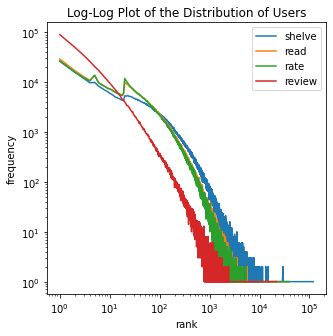

In [20]:
plt.figure(figsize=(5,5))
plt.loglog(shelve_user[:,0], shelve_user[:,1], label='shelve')
plt.loglog(read_user[:,0], read_user[:,1], label='read')
plt.loglog(rate_user[:,0], rate_user[:,1], label='rate')
plt.loglog(review_user[:,0], review_user[:,1], label='review')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Users')
plt.legend(loc='upper right')
plt.show()

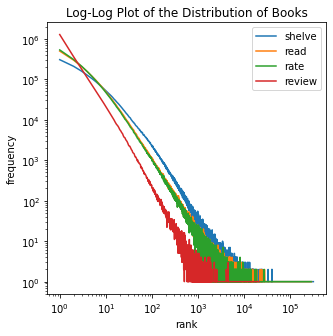

In [21]:
plt.figure(figsize=(5,5))
plt.loglog(shelve_book[:,0], shelve_book[:,1], label='shelve')
plt.loglog(read_book[:,0], read_book[:,1], label='read')
plt.loglog(rate_book[:,0], rate_book[:,1], label='rate')
plt.loglog(review_book[:,0], review_book[:,1], label='review')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Books')
plt.legend(loc='upper right')
plt.show()

In [22]:
interactions.head()

user_id  book_id  is_read  rating  is_reviewed
0        0      948        1       5            0
1        0      947        1       5            1
2        0      946        1       5            0
3        0      945        1       5            0
4        0      944        1       5            0

In [23]:
interactions.describe()

user_id       book_id       is_read        rating   is_reviewed
count 228648342.000 228648342.000 228648342.000 228648342.000 228648342.000
mean     250063.595    201575.642         0.490         1.801         0.071
std      171271.299    344867.659         0.500         2.073         0.257
min           0.000         0.000         0.000         0.000         0.000
25%      114301.000     12527.000         0.000         0.000         0.000
50%      233899.000     50346.000         0.000         0.000         0.000
75%      358110.000    222924.000         1.000         4.000         0.000
max      876144.000   2360649.000         1.000         5.000         1.000

In [24]:
# how many books are read as a percent of total books
read_df = interactions.loc[interactions['is_read'] == 1]
read_df2 = read_df.drop_duplicates(subset = 'book_id', keep = 'first')
read_df2['book_id'].count()/interactions['book_id'].nunique()

0.9911740410480164

In [25]:
# how many books are reviewed as a percent of total books
reviewed_df = interactions.loc[interactions['is_reviewed'] == 1]
reviewed_df2 = reviewed_df.drop_duplicates(subset = 'book_id', keep = 'first')
reviewed_df2['book_id'].count()/interactions['book_id'].nunique()

0.9999898333086227

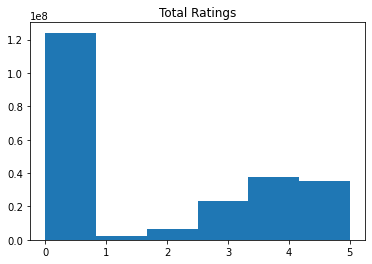

In [26]:
plt.hist(interactions['rating'], bins = 6)
plt.title('Total Ratings')
plt.show()

In [27]:
# summary data by user
user_df = pd.pivot_table(interactions, index = ['user_id'],
              values = ['is_read', 'rating', 'is_reviewed'],
              fill_value = '',
              aggfunc = np.sum
              )

In [28]:
user_df['average_rating'] = user_df['rating']/user_df['is_read']
reading_users = user_df.sort_values('is_read', ascending = False)[0:10]
reviewing_users = user_df.sort_values('is_reviewed', ascending = False)[0:10]
top_raters = user_df.sort_values('average_rating', ascending = False)[0:10]

In [29]:
reading_users

is_read  is_reviewed  rating  average_rating
user_id                                              
320562     38895            0  194416           4.998
257874     17366          295   52209           3.006
69818      14711         9542   48369           3.288
8515       13937          651   22077           1.584
438894     13163            5   48695           3.699
56065      13140          103   53253           4.053
280675     12726         5557   40885           3.213
298474     11599         4949   37941           3.271
32799      11458         1524   41888           3.656
72944      11053          572   54651           4.944

In [30]:
reviewing_users

is_read  is_reviewed  rating  average_rating
user_id                                              
283471        31        21812       2           0.065
32607        200        10056      45           0.225
69818      14711         9542   48369           3.288
363110      6540         7965   26327           4.026
28634       7794         7767   26219           3.364
128863      8534         7571   24517           2.873
410154      7185         7130   35432           4.931
339757      7108         5911   23514           3.308
280675     12726         5557   40885           3.213
173543      7423         5380   27002           3.638

In [31]:
top_raters

is_read  is_reviewed  rating  average_rating
user_id                                              
652423         1            0       5           5.000
511230         1            0       5           5.000
716286         2            0      10           5.000
595702         1            0       5           5.000
805457         5            0      25           5.000
511199         8            0      40           5.000
511206         1            0       5           5.000
595684         2            1      10           5.000
805429         2            0      10           5.000
716327         1            1       5           5.000

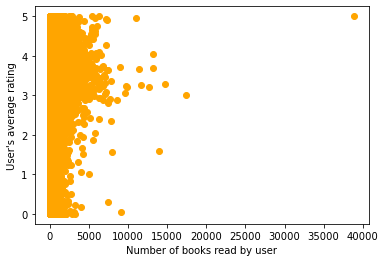

In [32]:
plt.scatter(user_df['is_read'], user_df['average_rating'], color = "orange")
plt.xlabel("Number of books read by user")
plt.ylabel("User's average rating")
plt.show()

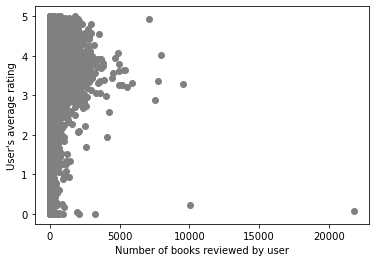

In [33]:
plt.scatter(user_df['is_reviewed'], user_df['average_rating'], color = "gray")
plt.xlabel("Number of books reviewed by user")
plt.ylabel("User's average rating")
plt.show()

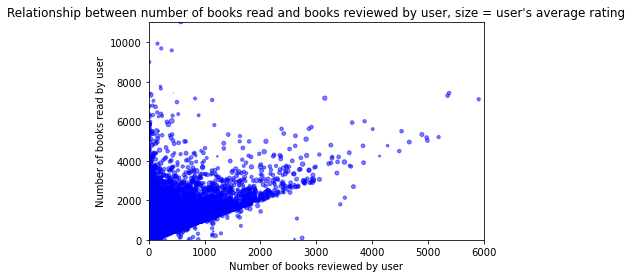

In [34]:
size = user_df['average_rating']**2
plt.scatter(user_df['is_reviewed'], user_df['is_read'], color = "blue", 
            s = size, alpha = 0.5)
plt.xlim(0, 6000)
plt.ylim(0, 11000)
plt.xlabel("Number of books reviewed by user")
plt.ylabel("Number of books read by user")
plt.title("Relationship between number of books read and books reviewed by user, size = user's average rating")
plt.show()

In [35]:
authors_df = pd.read_json(r'goodreads_book_authors.json', lines = True)

In [36]:
authors_df.head()
# good data - clean and can be analyzed

average_rating  author_id  text_reviews_count              name  \
0           3.980     604031                   7  Ronald J. Fields   
1           4.080     626222               28716     Anita Diamant   
2           3.920      10333                5075    Barbara Hambly   
3           3.680       9212               36262   Jennifer Weiner   
4           3.820     149918                  96     Nigel Pennick   

   ratings_count  
0             49  
1         546796  
2         122118  
3         888522  
4           1740

In [37]:
authors_df.describe()

average_rating    author_id  text_reviews_count  ratings_count
count      829529.000   829529.000          829529.000     829529.000
mean            3.845  5751610.429             106.865       1595.326
std             0.603  5129976.573            1770.226      44796.694
min             0.000        3.000               0.000          0.000
25%             3.580   932718.000               2.000          8.000
50%             3.900  4952564.000               6.000         31.000
75%             4.170  7838936.000              20.000        131.000
max             5.000 17343374.000          448570.000   18532721.000

In [38]:
authors_df.describe(include = 'object')

name
count      829529
unique     825851
top     Phil Noto
freq           22

In [39]:
# compare ratings and review count - does more reviews mean higher rating?
print(authors_df[authors_df['average_rating'] <= 3.844778]['ratings_count'].mean())
print(authors_df[authors_df['average_rating'] >= 3.844779]['ratings_count'].mean())

815.2323012419484
2248.4966046060413


In [40]:
# top 20 authors by rating
auth_rating = authors_df.sort_values('average_rating', ascending = False)
print(auth_rating[0:20])

        average_rating  author_id  text_reviews_count  \
436641           5.000   14881588                   1   
802866           5.000    3306855                   2   
802865           5.000   15220564                   1   
708351           5.000   14680775                   1   
802858           5.000    7892957                   2   
756048           5.000    5752051                   2   
332997           5.000    7099036                   2   
820472           5.000    7742306                   1   
560298           5.000    5491641                   1   
158748           5.000    2775452                   1   
686646           5.000     834785                   1   
506178           5.000   13822139                   1   
439325           5.000   12021490                   1   
708350           5.000   14680774                   1   
345611           5.000    7303866                   1   
627088           5.000   13668087                   1   
345612           5.000    64367

In [41]:
# top 20 authors with at least 500000 ratings
authors_df2000 = authors_df.loc[authors_df['ratings_count'] >= 500000]
auth_rating2 = authors_df2000.sort_values('average_rating', ascending = False)[0:20]
print(auth_rating2)

       average_rating  author_id  text_reviews_count                name  \
55429           4.670      13778                6141      Bill Watterson   
40258           4.540       2927              106761       Mary GrandPre   
4582            4.490     108424               57075    Patrick Rothfuss   
1104            4.450    1943477               78754    Kathryn Stockett   
4331            4.440    1077326              448570        J.K. Rowling   
7987            4.430    3433047              177987       Sarah J. Maas   
18511           4.390      11047                7834   Masashi Kishimoto   
1571            4.390       6492               24352     Francine Rivers   
65658           4.380    6540057               66225           Andy Weir   
774             4.370      38550              135990   Brandon Sanderson   
993             4.370     346732              164622  George R.R. Martin   
18279           4.360     304633               36115       Fiona Staples   
27807       

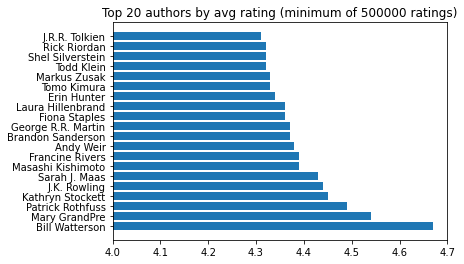

In [42]:
plt.xlim(4, 4.7)
plt.title("Top 20 authors by avg rating (minimum of 500000 ratings)")
plt.barh(auth_rating2['name'], auth_rating2['average_rating'])
plt.show()

In [43]:
# top 20 authors by # of text reviews
# authors_df = authors_df.loc[authors_df['text_reviews_count'] >= 5000]
auth_rating3 = authors_df.sort_values('text_reviews_count', ascending = False)[0:20]
print(auth_rating3)

       average_rating  author_id  text_reviews_count                name  \
4331            4.440    1077326              448570        J.K. Rowling   
24              4.010       3389              367487        Stephen King   
3630            4.270     153394              361037     Suzanne Collins   
6703            3.640     941441              300041     Stephenie Meyer   
15514           4.270     150038              295835     Cassandra Clare   
6339            4.100    1406384              289567          John Green   
2520            4.130    1221698              256693         Neil Gaiman   
5728            4.320      15872              251601        Rick Riordan   
1394            4.090    4039811              250205       Veronica Roth   
1261            3.970       3780              222666     James Patterson   
503             3.990       2383              190099       Gillian Flynn   
7987            4.430    3433047              177987       Sarah J. Maas   
1016        

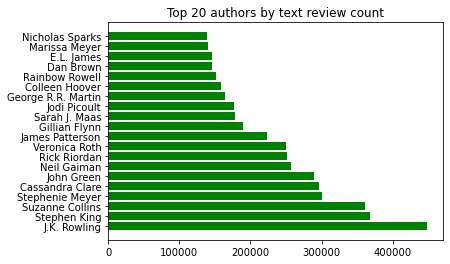

In [44]:
plt.title("Top 20 authors by text review count")
plt.barh(auth_rating3['name'], auth_rating3['text_reviews_count'], color = "green")
plt.show()

In [45]:
works_df = pd.read_json(r'goodreads_book_works.json', lines = True)
works_df.head()

# messy - remove rating_dist? remove several columns and create ratings_avg column?

books_count  reviews_count original_publication_month  \
0            1              6                          8   
1           22          10162                              
2            2            268                              
3           38          89252                          7   
4            2             49                              

  default_description_language_code  text_reviews_count  best_book_id  \
0                                                     1       5333265   
1                                                   741         25717   
2                                                     7       7327624   
3                                                  3504       6066819   
4                                                     5        287140   

  original_publication_year  \
0                      1984   
1                      2001   
2                      1987   
3                      2009   
4                      1990   

                                      original_title  \
0                       W. C. Fields: A Life on Film   
1                                        Good Harbor   
2                                                      
3                               Best Friends Forever   
4  Runic Astrology: Starcraft and Timekeeping in ...   

                                        rating_dist  \
0                       5:1|4:1|3:1|2:0|1:0|total:3   
1        5:517|4:1787|3:2763|2:966|1:196|total:6229   
2                  5:49|4:58|3:26|2:5|1:3|total:141   
3  5:9152|4:16855|3:19507|2:6210|1:1549|total:53273   
4                      5:6|4:1|3:3|2:3|1:2|total:15   

  default_chaptering_book_id original_publication_day original_language_id  \
0                                                                            
1                                                                            
2                                                                            
3                                                  14                        
4                                                                            

   ratings_count media_type  ratings_sum  work_id  
0              3       book           12  5400751  
1           6229       book        20150  1323437  
2            141       book          568  8948723  
3          53273       book       185670  6243154  
4             15       book           51   278577

In [46]:
works_df.describe()

books_count  reviews_count  text_reviews_count  best_book_id  \
count  1521962.000    1521962.000         1521962.000   1521962.000   
mean         4.554       1228.961              44.514  14980706.963   
std         17.191      20732.921             567.399  11208751.328   
min          1.000      -6069.000               0.000         1.000   
25%          1.000         18.000               2.000   3185278.750   
50%          2.000         76.000               5.000  15720429.000   
75%          4.000        327.000              15.000  24567873.250   
max       3676.000    6057595.000          156575.000  36619543.000   

       ratings_count  ratings_sum      work_id  
count    1521962.000  1521962.000  1521962.000  
mean         644.052     2574.487 23830901.606  
std        14799.440    60954.010 19467258.471  
min            0.000        0.000       40.000  
25%            7.000       26.000  3247694.250  
50%           26.000      101.000 21372039.500  
75%          110.000      423.000 43869448.250  
max      5066596.000 22110592.000 58379481.000

In [47]:
works_df.describe(include = 'object')

original_publication_month default_description_language_code  \
count                     1521962                           1521962   
unique                         13                                 1   
top                                                                   
freq                       486516                           1521962   

       original_publication_year original_title                  rating_dist  \
count                    1521962        1521962                      1521962   
unique                      1264         611914                       691714   
top                                              5:1|4:0|3:0|2:0|1:0|total:1   
freq                      252575         875056                        31763   

       default_chaptering_book_id original_publication_day  \
count                     1521962                  1521962   
unique                        661                       32   
top                                                          
freq                      1521302                   562502   

       original_language_id media_type  
count               1521962    1521962  
unique                    1          5  
top                               book  
freq                1521962    1102395

In [48]:
series_df = pd.read_json(r'goodreads_book_series.json', lines = True)
series_df.head()

# fairly clean - conduct text analysis on description? tfidf?

numbered note                                        description  \
0     true                                                           
1     true       This series is also known as * Avalon : Jalina...   
2     true       Plot-wise, "Crowner's Crusade" is a prequel to...   
3     true                                                           
4    false                                                           

                                      title  series_works_count  series_id  \
0                     Sun Wolf and Starhawk                   9     189911   
1                      Avalon: Web of Magic                  14     151854   
2                      Crowner John Mystery                  15     169353   
3                            Pluto's Snitch                   3    1052227   
4  The Way, With The Enchanted Neighborhood                   3    1070125   

   primary_work_count  
0                   3  
1                  12  
2                  15  
3                   3  
4                   3

In [49]:
series_df.describe()

series_works_count   series_id  primary_work_count
count          400390.000  400390.000          400390.000
mean               21.588  623045.017              19.772
std                65.103  294445.281              63.501
min               -14.000  144392.000               0.000
25%                 3.000  363737.250               3.000
50%                 6.000  615837.000               5.000
75%                14.000  877564.750              12.000
max               893.000 1143859.000             893.000

In [50]:
series_df.describe(include = ['boolean', 'object'])

numbered    note description                            title
count    400390  400390      400390                           400390
unique        2    2802       24384                           101434
top        true                      Don't Read in the Closet Events
freq     356008  375111      249371                              711

In [51]:
hp_series = series_df[series_df['title'].str.contains('Harry Potter') &
                     series_df['numbered'].str.contains('true')]
print(hp_series.shape)
print(hp_series)

(39, 7)
       numbered                                               note  \
872        true                                                      
1120       true  Cursed Child is NOT a Primary Work. Boxsets AR...   
2647       true  Cursed Child is NOT a Primary Work. Boxsets AR...   
3361       true  Cursed Child is NOT a Primary Work. Boxsets AR...   
3560       true  "Language" is not a landmark to split books fr...   
3841       true  Cursed Child is NOT a Primary Work. Boxsets AR...   
4898       true  Cursed Child is NOT a Primary Work. Boxsets AR...   
11291      true  Cursed Child is NOT a Primary Work. Boxsets AR...   
13470      true  Cursed Child is NOT a Primary Work. Boxsets AR...   
21132      true  Cursed Child is NOT a Primary Work. Boxsets AR...   
32662      true       partial books are 1A, 1B, etc., NOT 1.1, 1.2   
44514      true  Cursed Child is NOT a Primary Work. Boxsets AR...   
46064      true  Cursed Child is NOT a Primary Work. Boxsets AR...   
74956      t

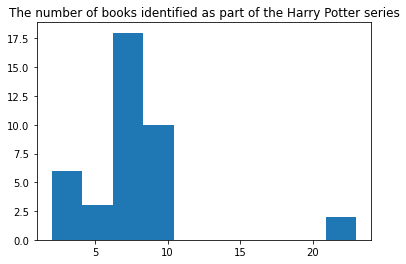

In [52]:
plt.hist(hp_series['primary_work_count'])
plt.title('The number of books identified as part of the Harry Potter series')
plt.show()

In [53]:
lotr_series = series_df[series_df['title'].str.contains('Lord of the Rings') &
                     series_df['numbered'].str.contains('true')]
print(lotr_series.shape)
print(lotr_series)

(26, 7)
       numbered                                               note  \
280        true  The list of translations is useful for series ...   
6269       true  The list of translations is useful for series ...   
7593       true  The list of translations is useful for series ...   
16445      true  The list of translations is useful for series ...   
58735      true  The list of translations is useful for series ...   
75448      true                                                      
75450      true                                                      
79634      true                                                      
85855      true                                                      
98963      true                                                      
98966      true                                                      
98967      true                                                      
153037     true                                                      
163675     t

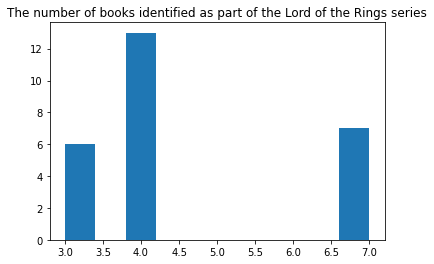

In [54]:
plt.hist(lotr_series['primary_work_count'])
plt.title('The number of books identified as part of the Lord of the Rings series')
plt.show()

In [55]:
genres_df= pd.read_json(r'goodreads_book_genres_initial.json', lines = True)
genres_df.head()

# clean up genres column to show all genres and count/genre

book_id                                             genres
0  5333265      {'history, historical fiction, biography': 1}
1  1333909  {'fiction': 219, 'history, historical fiction,...
2  7327624  {'fantasy, paranormal': 31, 'fiction': 8, 'mys...
3  6066819  {'fiction': 555, 'romance': 23, 'mystery, thri...
4   287140                                 {'non-fiction': 3}

In [56]:
# explode genres column (still in json format)
genres_df2 = pd.json_normalize(genres_df.genres)

In [57]:
genres_df2.head()

history, historical fiction, biography  fiction  fantasy, paranormal  \
0                                   1.000      nan                  nan   
1                                   5.000  219.000                  nan   
2                                     nan    8.000               31.000   
3                                     nan  555.000                  nan   
4                                     nan      nan                  nan   

   mystery, thriller, crime  poetry  romance  non-fiction  children  \
0                       nan     nan      nan          nan       nan   
1                       nan     nan      nan          nan       nan   
2                     1.000   1.000      nan          nan       nan   
3                    10.000     nan   23.000          nan       nan   
4                       nan     nan      nan        3.000       nan   

   young-adult  comics, graphic  
0          nan              nan  
1          nan              nan  
2          nan              nan  
3          nan              nan  
4          nan              nan

In [58]:
genres_df2.fillna(0, inplace = True)
genres_df2.head()

history, historical fiction, biography  fiction  fantasy, paranormal  \
0                                   1.000    0.000                0.000   
1                                   5.000  219.000                0.000   
2                                   0.000    8.000               31.000   
3                                   0.000  555.000                0.000   
4                                   0.000    0.000                0.000   

   mystery, thriller, crime  poetry  romance  non-fiction  children  \
0                     0.000   0.000    0.000        0.000     0.000   
1                     0.000   0.000    0.000        0.000     0.000   
2                     1.000   1.000    0.000        0.000     0.000   
3                    10.000   0.000   23.000        0.000     0.000   
4                     0.000   0.000    0.000        3.000     0.000   

   young-adult  comics, graphic  
0        0.000            0.000  
1        0.000            0.000  
2        0.000            0.000  
3        0.000            0.000  
4        0.000            0.000

In [59]:
genres_df2.describe()

history, historical fiction, biography     fiction  \
count                             2360655.000 2360655.000   
mean                                   43.307     168.046   
std                                   369.640    1055.529   
min                                   -32.000     -87.000   
25%                                     0.000       0.000   
50%                                     0.000       1.000   
75%                                     1.000      12.000   
max                                 18466.000   26316.000   

       fantasy, paranormal  mystery, thriller, crime      poetry     romance  \
count          2360655.000               2360655.000 2360655.000 2360655.000   
mean               110.860                    39.915       2.922      35.220   
std               1244.109                   423.225      73.039     276.336   
min                 -4.000                    -6.000      -2.000     -11.000   
25%                  0.000                     0.000       0.000       0.000   
50%                  0.000                     0.000       0.000       0.000   
75%                  0.000                     0.000       0.000       1.000   
max              54163.000                 22108.000    9400.000   10209.000   

       non-fiction    children  young-adult  comics, graphic  
count  2360655.000 2360655.000  2360655.000      2360655.000  
mean        20.366      24.464       48.185            8.097  
std        258.789     349.023      614.035          179.324  
min         -5.000      -3.000      -11.000           -2.000  
25%          0.000       0.000        0.000            0.000  
50%          0.000       0.000        0.000            0.000  
75%          0.000       0.000        0.000            0.000  
max      15486.000   15483.000    30180.000        15973.000

In [60]:
genres_sums = genres_df2.sum(axis = 0)
print(genres_sums)

history, historical fiction, biography   102232444.000
fiction                                  396699795.000
fantasy, paranormal                      261701592.000
mystery, thriller, crime                  94226447.000
poetry                                     6897839.000
romance                                   83142002.000
non-fiction                               48078235.000
children                                  57752225.000
young-adult                              113748515.000
comics, graphic                           19114748.000
dtype: float64


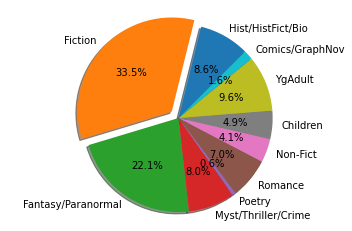

In [61]:
labels = 'Hist/HistFict/Bio','Fiction','Fantasy/Paranormal','Myst/Thriller/Crime','Poetry','Romance','Non-Fict','Children','YgAdult', 'Comics/GraphNov' 
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#fig1, ax1 = plt.subplots()
plt.pie(genres_sums, labels = labels, explode = explode, shadow = True, autopct='%1.1f%%', startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [62]:
def count_reviews(file_name):
    print('counting file:', file_name)
    n_review = 0
    book_set, user_set = set(), set()
    print('current line: ', end='')
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if n_review % 1000000 == 0:
                print(n_review, end=',')
            n_review += 1
            book_set.add(d['book_id'])
            user_set.add(d['user_id'])
    print('complete')
    print('done!')
    return n_review, len(book_set), len(user_set)

In [65]:
n_review, n_book, n_user = count_reviews(os.path.join('goodreads_reviews_dedup.json.gz'))
df_stats_review = pd.DataFrame([n_review, n_book, n_user], dtype=float,
                               columns=['count'], index=['# review', '# book', '# user'])
display(df_stats_review)

counting file: goodreads_reviews_dedup.json.gz
current line: 0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,11000000,12000000,13000000,14000000,15000000,complete
done!


count
# review 15739967.000
# book    2080190.000
# user     465323.000

In [66]:
def count_spoilers(file_name):
    print('counting file:', file_name)
    n_review, n_sentence, n_spoiler_review, n_spoiler_sentence = 0, 0, 0, 0
    book_set, user_set = set(), set()
    print('current line: ', end='')
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if n_review % 1000000 == 0:
                print(n_review, end=',')
            n_review += 1
            for _t, _ in d['review_sentences']:
                n_sentence += 1
                n_spoiler_sentence += _t
            n_spoiler_review += int(d['has_spoiler'])
            book_set.add(d['book_id'])
            user_set.add(d['user_id'])
    print('complete')
    print('done!')
    return n_review, n_sentence, n_spoiler_review, n_spoiler_sentence, len(book_set), len(user_set)

In [67]:
df_stats_spoiler = pd.DataFrame(res, columns=['count'], dtype=float, 
                               index=['# review', '# sentence', '# spoiler review', '# spoiler sentence',
                                      '# book', '# user'])
display(df_stats_spoiler)

NameError: name 'res' is not defined

Starter code came from https://github.com/MengtingWan/goodreads

Recommendation is to start with genre specific files
https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home